# Expand mesh and results for modal cyclic symmetry {#ref_basic_cyclic}

This example shows a modal cyclic symmetry model with mesh and results
expansions.


In [1]:
from ansys.dpf import core as dpf
from ansys.dpf.core import examples

Create the model and display the state of the result.


In [2]:
model = dpf.Model(examples.find_simple_cyclic())
print(model)

DPF Model
------------------------------
Modal analysis
Unit system: MKS: m, kg, N, s, V, A, degC
Physics Type: Mechanical
Available results:
     -  displacement: Nodal Displacement
     -  stress: ElementalNodal Stress 
     -  elemental_volume: Elemental Volume
     -  stiffness_matrix_energy: Elemental Energy-stiffness matrix
     -  artificial_hourglass_energy: Elemental Hourglass Energy
     -  thermal_dissipation_energy: Elemental thermal dissipation energy
     -  kinetic_energy: Elemental Kinetic Energy
     -  co_energy: Elemental co-energy
     -  incremental_energy: Elemental incremental energy
     -  structural_temperature: ElementalNodal Temperature
------------------------------
DPF  Meshed Region: 
  51 nodes 
  4 elements 
  Unit: m 
  With solid (3D) elements
------------------------------
DPF  Time/Freq Support: 
  Number of sets: 30 
Cumulative     Frequency (Hz) LoadStep       Substep        Harmonic index  
1              670386.325235  1              1          

# Expand displacement results

This example expands displacement results, by default on all nodes and
the first time step. Note that the displacements are expanded using the
`read_cyclic
<ansys.dpf.core.operators.mesh.mesh_provider.InputsMeshProvider.read_cyclic>`{.interpreted-text
role="func"} property with 2 as an argument (1 does not perform
expansion of the cyclic symmetry).


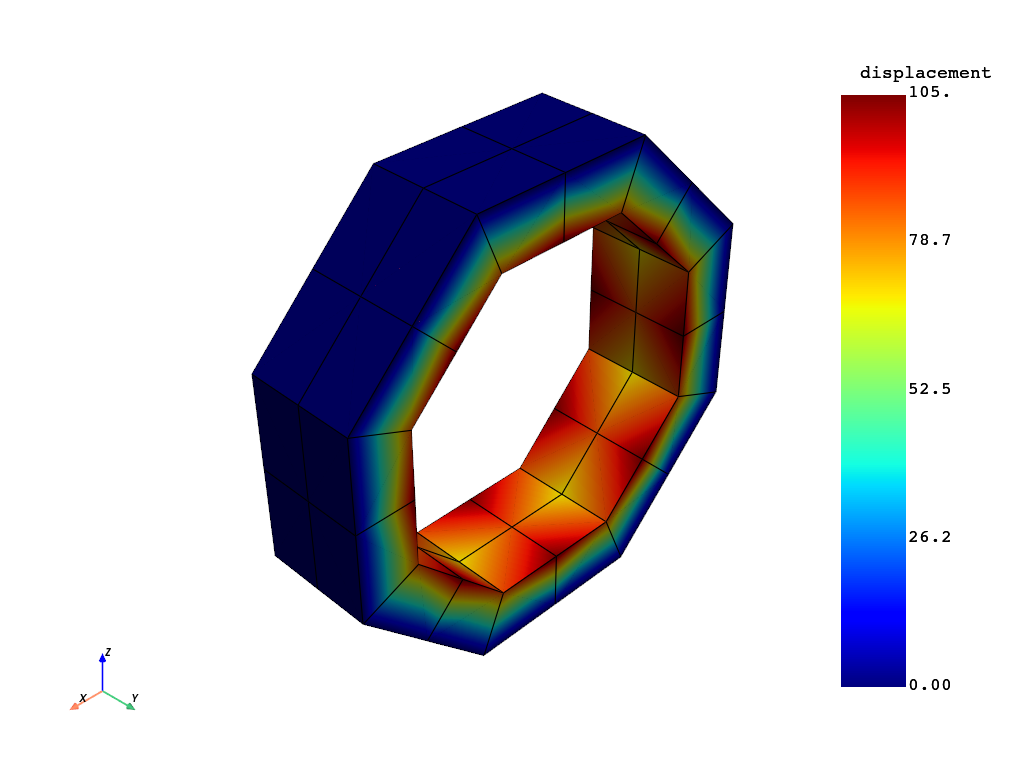

In [3]:
# Create displacement cyclic operator
u_cyc = model.results.displacement()
u_cyc.inputs.read_cyclic(2)

# expand the displacements
fields = u_cyc.outputs.fields_container()

# # get the expanded mesh
mesh_provider = model.metadata.mesh_provider
mesh_provider.inputs.read_cyclic(2)
mesh = mesh_provider.outputs.mesh()

# plot the expanded result on the expanded mesh
mesh.plot(fields[0])

# Expand stresses at a given time step


In [4]:
# define stress expansion operator and request stresses at time set = 8
scyc_op = model.results.stress()
scyc_op.inputs.read_cyclic(2)
scyc_op.inputs.time_scoping.connect([8])

# request the results averaged on the nodes
scyc_op.inputs.requested_location.connect(dpf.locations.nodal)

# request equivalent von mises operator and connect it to stress operator
eqv = dpf.operators.invariant.von_mises_eqv_fc(scyc_op)

# expand the results and get stress eqv
fields = eqv.outputs.fields_container()

# plot the expanded result on the expanded mesh
# mesh.plot(fields[0])

# Expand stresses at given sectors


In [5]:
# define stress expansion operator and request stresses at time set = 8
# request the results averaged on the nodes
# request results on sectors 1, 3 and 5
scyc_op = dpf.operators.result.cyclic_expanded_stress(
    streams_container=model.metadata.streams_provider,
    time_scoping=[8],
    requested_location=dpf.locations.nodal,
    sectors_to_expand=[1, 3, 5],
)

# extract Sx (use component selector and select the first component)
comp_sel = dpf.operators.logic.component_selector_fc(scyc_op, 0)

# expand the displacements and get the resuls
fields = comp_sel.outputs.fields_container()

# plot the expanded result on the expanded mesh
# mesh.plot(fields[0])

# Expand stresses and average to elemental location


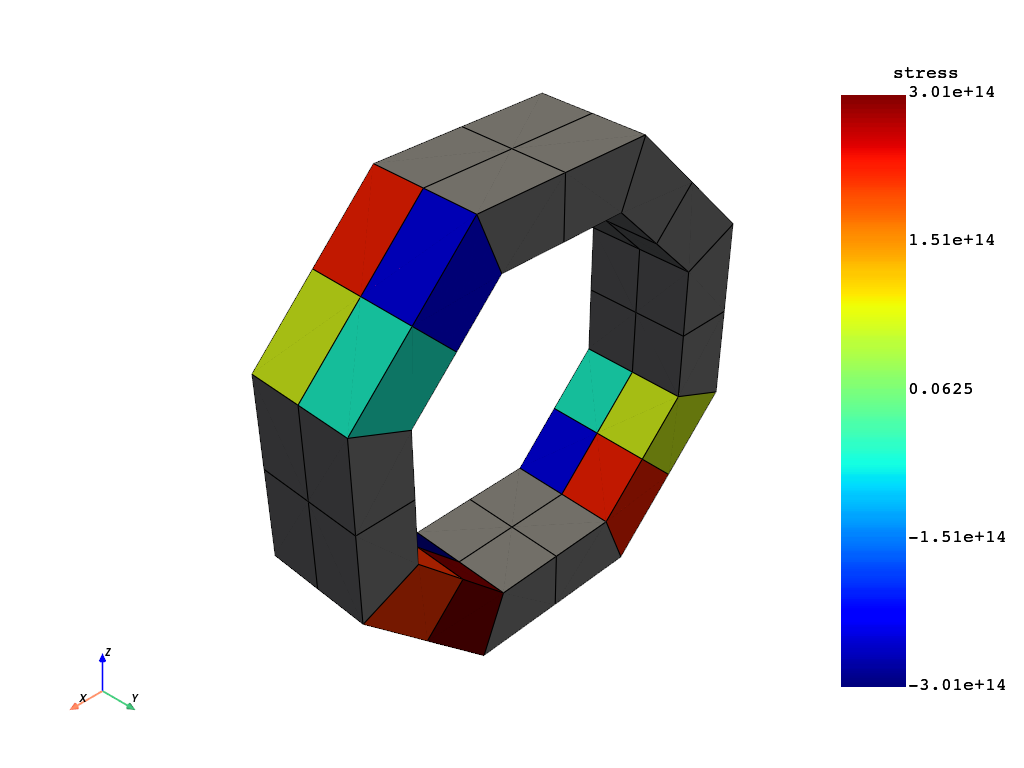

In [6]:
# define stress expansion operator and request stresses at time set = 8
scyc_op = dpf.operators.result.cyclic_expanded_stress(
    streams_container=model.metadata.streams_provider,
    time_scoping=[8],
    sectors_to_expand=[1, 3, 5],
    bool_rotate_to_global=False,
)

# request to elemental averaging operator
to_elemental = dpf.operators.averaging.to_elemental_fc(scyc_op)

# extract Sy (use component selector and select the component 1)
comp_sel = dpf.operators.logic.component_selector_fc(to_elemental, 1)

# expand the displacements and get the resuls
fields = comp_sel.outputs.fields_container()

# # plot the expanded result on the expanded mesh
mesh.plot(fields)